For given DNA sequences:
Sequence X is obtained from FASTA file (x.fasta)
Sequence Y is obtained from FASTA file (y.fasta)

The sequences might be contain ambiguous letters. Use seq = seq.replace(“<letter>”, “”) function to
remove the unwanted letter from the sequence.

<small>The ambiguous letters can be any character so filter the sequence after reading it from fasta file is a must.<small>

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO

In [4]:
ReadX = SeqIO.read("Latsol/x.fasta","fasta")
ReadY = SeqIO.read("Latsol/y.fasta","fasta")

SeqX =Seq(ReadX.seq)
SeqY =Seq(ReadY.seq)

In [6]:
def clean(Seq):
    for letter in "BDEFHIJKLMNOPQRUVWXYZ":
        Seq = Seq.replace(letter,"")
    return Seq

In [7]:
print(len(SeqX))
print(len(SeqY))

1883
1050


In [8]:
SeqX = clean(SeqX)
SeqY = clean(SeqY)

# 1. Sequence Manipulation:
* Display the total length of Sequence X and Y

In [9]:
print(len(SeqX))
print(len(SeqY))

1865
1050


* Display which index the first time the codon (CGC) appears in Sequence X and Y.

In [10]:
print(SeqX.find("CGC"))
print(SeqY.find("CGC"))

51
39


## Create a new sequence using the following task below:
-
    - Take the first 10 nucleotides from Sequence X and the last 5 nucleotides from Sequence X.
    - o Take the first 20 nucleotides from Sequence Y and the last 3 nucleotides from Sequence Y.
    - Combine both of the string above and reverse it to a new sequence, Sequence Z.

In [13]:
Seq1 = SeqX[:10]+SeqX[-5:]
Seq2 = SeqY[:20]+SeqY[-3:]
SeqZ= Seq1 + Seq2
SeqZ = SeqZ[::-1]

SeqZ

Seq('CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA')

# 2. Sequence Analysis & Plotting
* Display the nucleotides base (A and C) frequency for Sequence C with a chart using matplotlib
library. You are free to plot using bar or pie chart.

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

In [16]:
freq = Counter(SeqZ)

freqKey = ['A','C']
freqVal = [freq[key]for key in freqKey]

<BarContainer object of 2 artists>

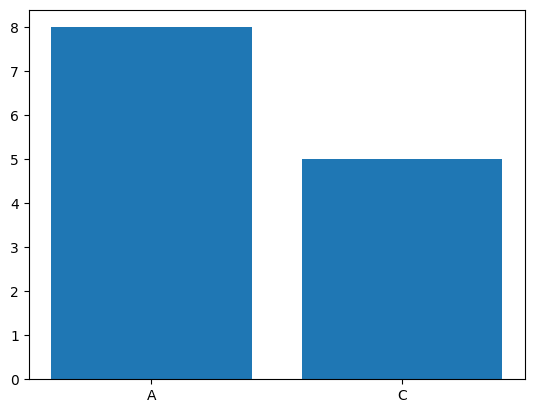

In [17]:
plt.bar(freqKey,freqVal)

+ Display GC and AT content percentage for Sequence C.

In [19]:
from Bio.SeqUtils import GC123

GCsZ = GC123(SeqZ)[0]
ATsZ = 100- GCsZ

print(GCsZ,ATsZ)

50.0 50.0


+ Display melting temperature for Sequence C using Wallace method.

In [20]:
from Bio.SeqUtils import MeltingTemp as mt

print("%.2f" % mt.Tm_Wallace(SeqZ))

114.00


+ Display molecular weight for Sequence C.

In [21]:
from Bio.SeqUtils import molecular_weight as mw
print("%.2f" % mw(SeqZ))

11924.58


# 3. DNA and mRNA Protein Synthesis:
+ Transcribe and display the DNA sequence C into mRNA Sequence.

In [22]:
mRNAsZ = SeqZ.transcribe()
mRNAsZ

Seq('CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA')

+ Translate and display the mRNA sequence C into amino acids Sequence.

In [23]:
AminosZ = SeqZ.translate()
AminosZ

c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('QTVSR*L*LRLW')

In [24]:
from Bio.SeqUtils import seq3
ProtsZ = seq3(AminosZ)
ProtsZ

'GlnThrValSerArgTerLeuTerLeuArgLeuTrp'

# 4. Sequence Alginment & Similarities:
+ Perform local alignment pairwise between sequence A and sequence B and display the alignment
score.

In [26]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [35]:
Local1 = pairwise2.align.localxx(SeqX,SeqY)
print(format_alignment(*Local1[0]))

6 GTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGCTCCCACGGCCGG-GACAC

In [34]:
Local2 = pairwise2.align.localms(SeqX,SeqY,2,-1,-0.6,-0.2)
print(format_alignment(*Local2[0]))

4 GTGT---TGGATCTGGACTTGTTTCGGACGGATAAAGGAG-GAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGG-TGAAGGC-GGACGGCGAGTGG--CGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATG--CAGCAAG-ACAATTGGAGAGAAAAT-GAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAA--G---TGTCACAGATCAAAAAACTCCGACTCC---TCATCGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTT-GA-GAACCTC-CG----CGAGC-T-GCATCCCTCGGTGC---CC--ATCAGTAACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACT-CGC---ACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCG--AGGGTACTTCCTGAAGG-GGC-CCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGGTGGCACAGCTC-AGCCAGTTTGATGAAGAGCTTTACAAG-GTGATTGGCAAAG-GCAGTGAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCA-GCCC--ATCGC-TGCTCTCCACCGAGATG-AGTG-GCTACGGC---CAGAGGATTTGCCCATCAAGTATGCTG-GCCTGTCCACCTGCTTT-CGCCAGGAGGTGGGCTCCCACGGCCGG-GACACCCGCGGCATCTTC

In [32]:
Global = pairwise2.align.globalxx(SeqX,SeqY)
print(format_alignment(*Global[0]))

ATGGTGTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGCTCCCACGGCCGG-GA

+ Find and display the Hamming and Levenshtein distance between Sequence A and B

In [36]:
def hamming(seqA,seqB):
    h = []
    for x,y in zip(seqA,seqB):
        if(x!=y):
            h.append((x,y))
    return len(h)

In [41]:
hamming(SeqX,SeqY)

755

In [43]:
from Levenshtein import distance
print(distance(SeqX,SeqY))

1028


In [47]:
print(len(SeqX))
print(len(SeqY))

1865
1050
